<a href="https://colab.research.google.com/github/pandeykiran80/ceri8211globalgeophysics/blob/master/HW6_Gravity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on [this StackExchange thread](https://space.stackexchange.com/questions/27779/how-can-i-verify-my-reconstructed-gravity-field-of-ceres-from-spherical-harmonic).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

In [0]:
pi, two_pi = [f*np.pi for f in (1, 2)]
degs, rads = 180/pi, pi/180
j = np.complex(0, 1)

In [68]:
#link to google drive for loading data file
from google.colab import drive
drive.mount('/content/drive') 
!ls "/content/drive/My Drive/Colab Notebooks/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
firstnotebook.ipynb  gravity_reconstruction.ipynb
GGM05C.ICGEM	     SphericalHarmonics.ipynb


In [0]:
#fname = "/content/drive/My Drive/Colab Notebooks/GGM05C.ICGEM"
# open the data file
with open("/content/drive/My Drive/Colab Notebooks/GGM05C.ICGEM", 'r') as data:
    lines = data.readlines()

header = 35 # there are 35 header lines in the data file

h_lines = [line.split() for line in lines[header:]]
indices = np.array([[int(x)   for x in line[1:3]] for line in h_lines])
coefficient  = np.array([[float(x.replace('D', 'E')) for x in line[3:5]] for line in h_lines])
 # Generating complex coefficents
Complex_coefficient = (np.array([1, -j]) * coefficient).sum(axis=1) 


In [0]:
ph         = np.linspace(0,  np.pi,    180+1)
th         = np.linspace(0,  2*np.pi, 360+1)
phi, theta = np.meshgrid(ph, th, indexing='ij')

harmonics = []
nmax = 10 # Max degree
for (n, m), Complex_coefficient  in zip(indices, Complex_coefficient ): # Order (m) degree (n)
    if n > nmax:
      break
    sph_harmonic_funct = sph_harm(m, n, theta, phi)
    harmonics.append((n, m, (sph_harmonic_funct * Complex_coefficient ).real)) 

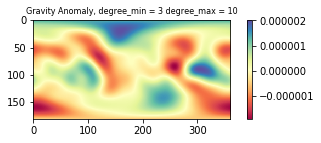

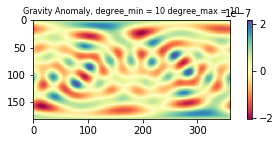

In [78]:
# evaluate gravity anomalies
degre_limit = (3, 10)  # from 3 to 10 degree

DeltaGs = []

for degree_min in degre_limit:
    count = 0
    DeltaG = np.zeros_like(phi)
    for n, m, h in harmonics:
        if n >= degree_min:
            DeltaG += h
            count += 1
    DeltaGs.append(DeltaG)

if True:
    plt.figure()
    for i, (degree_min, DeltaG) in enumerate(zip(degre_limit, DeltaGs)):
        plt.subplot(len(DeltaGs), 1,i+1)
        plt.imshow(DeltaG, cmap='Spectral')
        plt.title('Gravity Anomaly, degree_min = ' + str(degree_min) + ' degree_max = ' + str(nmax), fontsize = 8)
        plt.colorbar()
        plt.show()

In [0]:
#fname = "/content/drive/My Drive/Colab Notebooks/GGM05C.ICGEM"
# open the data file
with open("/content/drive/My Drive/Colab Notebooks/GGM05C.ICGEM", 'r') as data:
    lines = data.readlines()

header = 35 # there are 35 header lines in the data file

h_lines = [line.split() for line in lines[header:]]
indices = np.array([[int(x)   for x in line[1:3]] for line in h_lines])
coefficient  = np.array([[float(x.replace('D', 'E')) for x in line[3:5]] for line in h_lines])
 # Generating complex coefficents
Complex_coefficient = (np.array([1, -j]) * coefficient).sum(axis=1) 
harmonics = []
nmax = 60 # Max degree
for (n, m), Complex_coefficient  in zip(indices, Complex_coefficient ): # Order (m) degree (n)
    if n > nmax:
      break
    sph_harmonic_funct = sph_harm(m, n, theta, phi)
    harmonics.append((n, m, (sph_harmonic_funct * Complex_coefficient ).real)) 

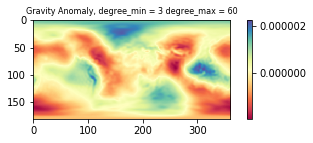

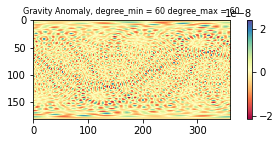

In [84]:
# evaluate gravity anomalies
degre_limit = (3, 60)  # from 3 to 10 degree

DeltaGs = []

for degree_min in degre_limit:
    count = 0
    DeltaG = np.zeros_like(phi)
    for n, m, h in harmonics:
        if n >= degree_min:
            DeltaG += h
            count += 1
    DeltaGs.append(DeltaG)

if True:
    plt.figure()
    for i, (degree_min, DeltaG) in enumerate(zip(degre_limit, DeltaGs)):
        m= len(DeltaGs)
        plt.subplot(m, 1,i+1)
        plt.imshow(DeltaG, cmap='Spectral')
        plt.title('Gravity Anomaly, degree_min = ' + str(degree_min) + ' degree_max = ' + str(nmax), fontsize = 8)
        plt.colorbar()
        plt.show()